# Method 2 - Neural Network

C:\Users\speed\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\speed\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.7740 - loss: 0.7544 - val_accuracy: 0.9098 - val_loss: 0.2805
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9115 - loss: 0.2699
Validation Accuracy: 0.909761905670166
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


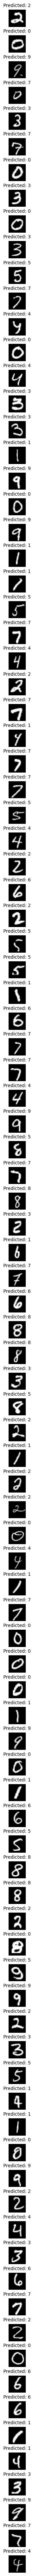

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocess the data
X_train = train_data.drop('label', axis=1).values.astype('float32') / 255.0
y_train = train_data['label'].values
X_test = test_data.values.astype('float32') / 255.0

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=1, validation_data=(X_val, y_val))

# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

# Make predictions on test data
predictions = np.argmax(model.predict(X_test), axis=1)

# Create submission DataFrame
submission_df = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_neuralNetwork.csv', index=False)


# Plotting some images
num_images = 100
plt.figure(figsize=(20, 100))  # Adjusting figure size
for i in range(num_images):
    plt.subplot(num_images, 1, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i]}', fontsize=10)  # Adjusting title font size
    plt.axis('off')
    if i != num_images - 1:
        plt.subplots_adjust(hspace=0.5)  # Adjusting gap between images
plt.show()

